In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
#plt.style.use('pandas1book') 
sns.set_context('talk')
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

# Version

In [2]:
print(pd.__version__)

2.1.4


# INFO

In [3]:
df = pd.read_csv('./assets/gapminder.tsv',sep='\t')

df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


,count,mean,std,min,25%,50%,75%,max
year,1704.0,1.979500e+03,1.726533e+01,1952.000000,1.965750e+03,1.979500e+03,1.993250e+03,2.007000e+03
lifeExp,1704.0,5.947444e+01,1.291711e+01,23.599000,4.819800e+01,6.071250e+01,7.084550e+01,8.260300e+01
pop,1704.0,2.960121e+07,1.061579e+08,60011.000000,2.793664e+06,7.023596e+06,1.958522e+07,1.318683e+09
gdpPercap,1704.0,7.215327e+03,9.857455e+03,241.165876,1.202060e+03,3.531847e+03,9.325462e+03,1.135231e+05


In [4]:
print(df.shape)
print(type(df))

(1704, 6)
<class 'pandas.core.frame.DataFrame'>


# Print

In [5]:
print(df.head(3).to_string())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710


In [6]:
print(df.tail(3).to_string())

       country continent  year  lifeExp       pop   gdpPercap
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [7]:
print(df.sample(3).to_string())

         country continent  year  lifeExp      pop     gdpPercap
951         Mali    Africa  1967   38.487  5212416    545.009887
476  El Salvador  Americas  1992   66.798  5274649   4444.231700
419      Denmark    Europe  2007   78.332  5468120  35278.418740


In [8]:
print(f"columns::{df.columns}")
print(f"index::::{df.index}")

columns::Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
index::::RangeIndex(start=0, stop=1704, step=1)


In [9]:
# Numpy version
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.332, 9240934, 820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.10071],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499603],
       ['Zimbabwe', 'Africa', 2002, 39.989, 11926563, 672.0386227],
       ['Zimbabwe', 'Africa', 2007, 43.487, 12311143, 469.7092981]],
      dtype=object)

In [10]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [11]:
country = df['country']   # Series

print(type(country))

<class 'pandas.core.series.Series'>


# Slicing and Indexing

In [12]:
df.loc[2]  # 3rd record

country      Afghanistan
continent           Asia
year                1962
lifeExp           31.997
pop             10267083
gdpPercap      853.10071
Name: 2, dtype: object

In [13]:
df.loc[[2,0]]   #3rd and 1st record

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [14]:
try:
    df.loc[-1]
except KeyError as ke:
    print(ke.__repr__())
    print("Negative index won't work in loc")

KeyError(-1)
Negative index won't work in loc


In [15]:
df.iloc[[2,-1]]

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


# Filtering and Subseting

In [16]:
df.loc[ df['country']=="Afghanistan" , ["country","year"]]   # RIGHT SIDE comma specify "subset of Dataframe"  # LEFT SIDE condition we want to pull

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
5,Afghanistan,1977
6,Afghanistan,1982
7,Afghanistan,1987
8,Afghanistan,1992
9,Afghanistan,1997


In [17]:
subset = df.loc[:, ['year', 'pop']] # : represent all records
print(subset.shape, subset.columns)

subset =  df.iloc[:, [2, 4]]        #  2,4 represent position of columns
print(subset.shape, subset.columns)

(1704, 2) Index(['year', 'pop'], dtype='object')
(1704, 2) Index(['year', 'pop'], dtype='object')


In [18]:
df.loc[(df['country'] == 'United States') & (df['year'] == 1982)]

,country,continent,year,lifeExp,pop,gdpPercap
1614,United States,Americas,1982,74.65,232187835,25009.55914


# SQL transformations

In [19]:
df.groupby("year")['lifeExp'].agg(['mean','median','min','max','sum','prod'])

,mean,median,min,max,sum,prod
year,,,,,,
1952,49.057620,45.1355,28.801,72.670,6966.18200,1.564323e+238
1957,51.507401,48.3605,30.332,73.470,7314.05096,2.195431e+241
1962,53.609249,50.8810,31.997,73.680,7612.51336,9.075308e+243
1967,55.678290,53.8250,34.020,74.160,7906.31712,3.017474e+246
1972,57.647386,56.5300,35.400,74.720,8185.92888,5.920396e+248
1977,59.570157,59.6720,31.220,76.110,8458.96236,7.609392e+250
1982,61.533197,62.4415,38.445,77.110,8737.71400,1.109257e+253
1987,63.212613,65.8340,39.906,78.670,8976.19100,6.088937e+254
1992,64.160338,67.7030,23.599,79.360,9110.76800,3.442806e+255


In [23]:
print(type(df.groupby("year")))
print(type(df.groupby("year")["lifeExp"]))


tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
print(type(tranformed_df))
print(tranformed_df.to_string())

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
<class 'pandas.core.frame.DataFrame'>
                  lifeExp               gdpPercap                         pop              
                     mean       std          mean           std          mean           std
year continent                                                                             
2002 Africa     53.325231  9.586496   2599.385159   2972.651308  1.603315e+07  2.230300e+07
     Americas   72.422040  4.799705   9287.677107   8895.817785  3.399091e+07  6.560155e+07
     Asia       69.233879  8.374595  10174.090397  11150.719203  1.091455e+08  2.767017e+08
     Europe     76.700600  2.922180  21711.732422  11197.355517  1.927413e+07  2.322369e+07
     Oceania    79.740000  0.890955  26938.778040   5301.853680  1.172741e+07  1.105827e+07
2007 Africa     54.806038  9.630781   3089.032605   3618.163491  1.787576e+07  2.491773e+07
     Americas   73.608120  

C:\Users\muthu\AppData\Local\Temp\ipykernel_24664\2398318896.py:5: FutureWarning: The provided callable <function mean at 0x000001BEE5AB4EE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
C:\Users\muthu\AppData\Local\Temp\ipykernel_24664\2398318896.py:5: FutureWarning: The provided callable <function std at 0x000001BEE5AB5000> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  tranformed_df = df.loc[df['year']>2000].groupby(["year", "continent"])[["lifeExp", "gdpPercap", "pop"]].agg([np.mean, np.std])
C:\Users\muthu\AppData\Local\Temp\ipykernel_24664\2398318896.py:5: FutureWarning: The provided callable <function mea

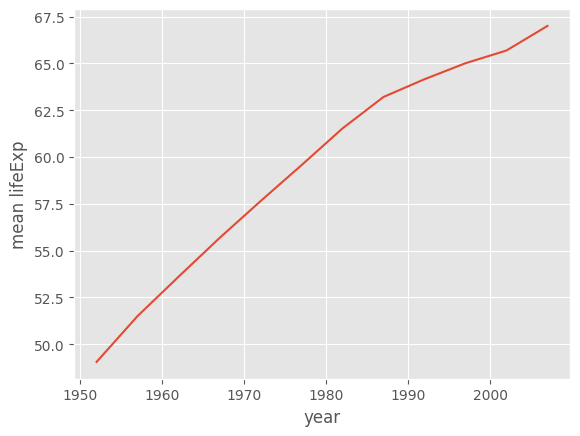

In [19]:
df.groupby(['year'])['lifeExp'].mean().plot(kind='line')
plt.ylabel("mean lifeExp")
plt.show()

C:\Users\muthu\AppData\Local\Temp\ipykernel_20668\4164612163.py:1: FutureWarning: The provided callable <function std at 0x000001EB7E955000> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(['year'])['lifeExp'].agg(np.std).plot(kind='line')


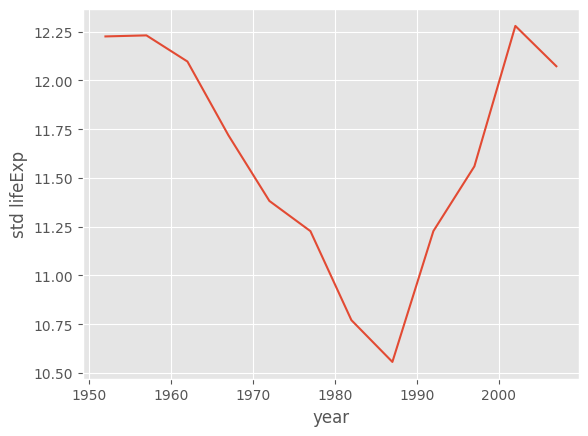

In [20]:
df.groupby(['year'])['lifeExp'].agg(np.std).plot(kind='line')
plt.ylabel("std lifeExp")
plt.show()

In [21]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()

C:\Users\muthu\AppData\Local\Temp\ipykernel_20668\3713066630.py:1: FutureWarning: The provided callable <function mean at 0x000001EB7E954EE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()


,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


In [24]:
# Play around with sample CSV

table1 = pd.read_csv("./assets/table1.csv")
table2 = pd.read_csv("./assets/table2.csv")
table3 = pd.read_csv("./assets/table3.csv")
table4a = pd.read_csv("./assets/table4a.csv")
table4b = pd.read_csv("./assets/table4b.csv")

# Long Tail and FAT Matrix

In [36]:
pew = pd.read_csv("./assets/pew.csv")
print(pew.shape)

(18, 11)


In [39]:
pew.melt(
    id_vars='religion',  # we don't want to change,
    var_name='income',   # rest of all columns 
    value_name='count'   # their co-responding values
)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8
